# <b>1 <span style='color:#0000FF'>|</span> Introduction</b>


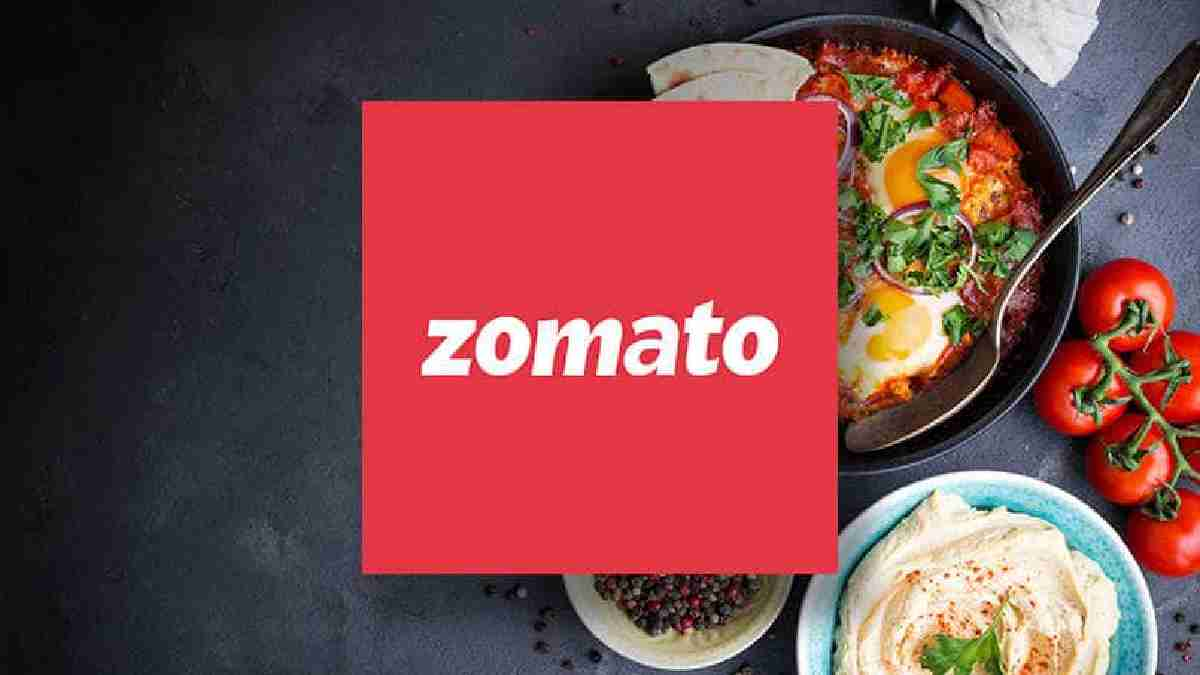

<p style="color:#0099e6;font-size:25px;font-family:Georgia;text-align:center;">Bengaluru <strong style="color:#fd1c20;font-size:25px;font-family:Georgia;">city </strong></p>


<p style= "font-family:Georgia;color:#000000;font-size:110%;text-align:justify;border-radius:10px 10px;border-style: solid;border-width:5px;border-color:#fbff00;"><br><b> Bangalore(officially known as Bengaluru) is the capital and largest city of the Indian state of Karnataka.</b><br> 
<br>  - With a population of over 15 million, Bangalore is the third largest city in India and 27th largest city in the world. Bangalore is one of the most ethnically diverse cities in the country, with over 51% of the city’s population being migrants from other parts of India. <br>  
<br>- Bangalore is sometimes referred to as the “Silicon Valley of India”(or “IT capital of India”) because of its role as the nation’s leading information technology(IT) exporter.<br>
    <br> - Bangalore has a unique food culture. Restaurants from all over the world can be found here in Bengaluru, with various kind of cuisines.<br>
    <br> - Some might even say that Bangalore is the best place for foodies. The food industry is always at a rise in Bangalore, with 12,000 plus restaurants currently active in the city, the number is still increasing. The growing number of restaurants and dishes in Bangalore is what attracts me to inspect the data to get some insights, some interesting facts and figures.<br>
<br></p>

<h3 style="color:#0099e6;font-size:35px;font-family:Georgia;text-align:center;"><strong><strong style="color:#fd1c20;font-size:35px;font-family:Georgia;">About <strong style="color:#00e617;font-size:35px;font-family:Georgia;">The <strong style="color:#0099e6;font-size:35px;font-family:Georgia;">Dataset </strong></strong></strong></strong></h3>

<p style= "font-family:Georgia;color:#000000;font-size:110%;text-align:justify;border-radius:10px 10px;border-style: solid;border-width:5px;border-color:#fbff00;"><br> <b> 1. url :-</b>This feature contains the url of the restaurant on the Zomato website<br>
<b> 2. address :-</b>This feature contains the address of the restaurant in Bangalore.<br>
<b> 3. name :-</b> This feature contains the name of the restaurant.<br>
<b>4. online_order :-</b> whether online ordering is available in the restaurant or not.<br>
<b>5. book_table :-</b> table book option available or not<br>
<b>6. rate :-</b>contains the overall rating of the restaurant out of 5.<br>
<b>7. votes :-</b> contains total number of upvotes for the restaurant.<br>
<b>8. phone :-</b> contains the phone number of the restaurant.<br>
<b>9. location :-</b> contains the neighborhood in which the restaurant is located.<br>
<b>10. rest_type :-</b> restaurant type.<br>
<b>11. dish_liked :-</b> dishes people liked in the restaurant.<br>
<b>12. cuisines :-</b> food styles.<br>
<b>13. approx_cost(for two people) :-</b> contains the approximate cost of meal for two people.<br>
<b>14. reviews_list :-</b> list of tuples containing reviews for the restaurant, each tuple consists of two values, rating and review by the customer.<br>    
<b>15. menu_item :-</b> contains list of menus available in the restaurant<br> 
<b>16. listed_in(type) :-</b> type of meal.<br>     
<b>17. listed_in(city) :-</b> contains the neighborhood in which the restaurant is located. <br> 
    
    <br>
    
</p>

# <b>2 <span style='color:#0000FF'>|</span> Importing libraries</b>

In [4]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_profiling import ProfileReport
import missingno as msno      ## for missing values
from tqdm import tqdm
import re
from sklearn.preprocessing import StandardScaler 
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from datasist.structdata import detect_outliers

# data modeling 
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay ,accuracy_score, precision_score, recall_score, f1_score, fbeta_score, classification_report
from sklearn.model_selection import cross_validate
from lazypredict.Supervised import LazyClassifier    ## show all possible models
import joblib

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
sns.set(rc={'figure.figsize': [10, 6]}, font_scale=1.3)
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)


# <b>3 <span style='color:#0000FF'>|</span> Reading the dataset</b>

In [5]:
data=pd.read_csv(r'C:\Users\ascom\Epsilon Training work\Classification_2\zomato\zomato.csv')
data.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [6]:
data.shape

(51717, 17)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

In [8]:
data.describe().T.style.set_properties(**{'background-color': '#FFFF99','color': 'black','border-color': 'white'})

,count,mean,std,min,25%,50%,75%,max
votes,51717.000000,283.697527,803.838853,0.000000,7.000000,41.000000,198.000000,16832.000000


In [9]:
data.describe(include='O').T.style.set_properties(**{'background-color': '#FFFF99','color': 'black','border-color': 'white'})

,count,unique,top,freq
url,51717,51717,https://www.zomato.com/bangalore/jalsa-banashankari?context=eyJzZSI6eyJlIjpbNTg2OTQsIjE4Mzc1NDc0IiwiNTkwOTAiLCIxODM4Mjk0NCIsIjE4MjI0Njc2IiwiNTkyODkiLCIxODM3MzM4NiJdLCJ0IjoiUmVzdGF1cmFudHMgaW4gQmFuYXNoYW5rYXJpIHNlcnZpbmcgQnVmZmV0In19,1
address,51717,11495,Delivery Only,128
name,51717,8792,Cafe Coffee Day,96
online_order,51717,2,Yes,30444
book_table,51717,2,No,45268
rate,43942,64,NEW,2208
phone,50509,14926,080 43334321,216
location,51696,93,BTM,5124
rest_type,51490,93,Quick Bites,19132
dish_liked,23639,5271,Biryani,182


In [10]:
data.isnull().sum()

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

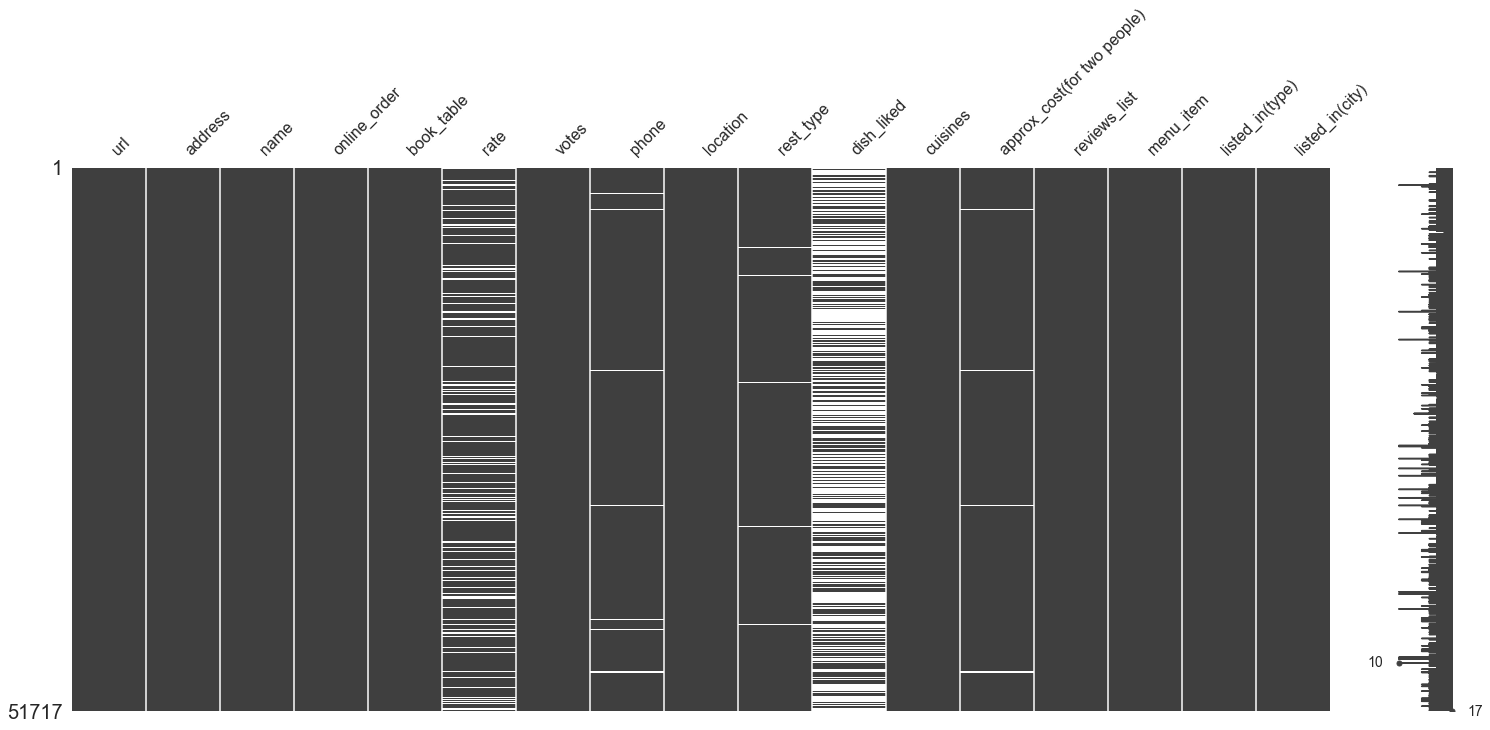

In [11]:
msno.matrix(data)
plt.show()

In [12]:
data.duplicated().sum()

0

<p style= "font-family:Georgia;color:#000000;font-size:110%;text-align:center;border-radius:10px 10px;border-style: solid;border-width:5px;border-color:#fbff00;"><br>
There is no <b> Dublicated </b> values   
<br></p>

# <b><span style='color:#0000FF'></span> `Datasist First Analysis` </b>

In [13]:
import datasist
datasist.structdata.describe(data)

First five data points


,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari




Random five data points


,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
36047,https://www.zomato.com/bangalore/johnny-fox-ho...,"17, Chikkalakshmahia Layout, Opposite Royal En...",Johnny Fox,No,No,3.9 /5,70,+91 9880292984,Hosur Road,Bar,NaN,"North Indian, Chinese","1,500","[('Rated 5.0', 'RATED\n A decent place to dri...",[],Delivery,Koramangala 7th Block
16009,https://www.zomato.com/bangalore/udupi-bhavan-...,"37, Harlur Road, Next to Indian Oil Petrol Bun...",Udupi Bhavan,Yes,No,3.8/5,170,+91 8147278338\r\n+91 9035351777,HSR,Quick Bites,"Vada, Masala Dosa, Coffee","Chinese, North Indian, South Indian",400,"[('Rated 3.0', 'RATED\n Have taken home deliv...",[],Delivery,HSR
40344,https://www.zomato.com/bangalore/south-ruchis-...,"Raceview Hotel, Madhava Nagar, Race Course Roa...",South Ruchis Square,Yes,Yes,4.3 /5,1033,+91 7022141080\n+91 8048513591,Race Course Road,Casual Dining,"Pongal, Filter Coffee, Bonda Soup, Thali, Neer...","North Indian, South Indian, Chinese",850,"[('Rated 3.0', 'RATED\n We visited this place...","['Dal Khichadi', 'Veg Biryani', 'Tamatar Dhani...",Dine-out,Malleshwaram
31898,https://www.zomato.com/bangalore/hello-dish-bi...,"2nd Cross, Maruthi Nager, BTM, Bangalore",Hello Dish Biriyani,No,No,NaN,0,+91 9986491549\r\n+91 8111924516,BTM,Quick Bites,NaN,Biryani,200,[],[],Dine-out,Koramangala 5th Block
4226,https://www.zomato.com/bangalore/burrito-boys-...,"RMZ Ecoworld, Bellandur, Bangalore",Burrito Boys,No,No,2.7/5,39,+91 8892761093\r\n+91 9980844403,Bellandur,Food Court,Rice Bowl,"Mexican, Tex-Mex",330,"[('Rated 3.0', ""RATED\n Burrito boys is a cha...",[],Delivery,Bellandur




Last five data points


,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
51712,https://www.zomato.com/bangalore/best-brews-fo...,"Four Points by Sheraton Bengaluru, 43/3, White...",Best Brews - Four Points by Sheraton Bengaluru...,No,No,3.6 /5,27,080 40301477,Whitefield,Bar,NaN,Continental,"1,500","[('Rated 5.0', ""RATED\n Food and service are ...",[],Pubs and bars,Whitefield
51713,https://www.zomato.com/bangalore/vinod-bar-and...,"Number 10, Garudachar Palya, Mahadevapura, Whi...",Vinod Bar And Restaurant,No,No,NaN,0,+91 8197675843,Whitefield,Bar,NaN,Finger Food,600,[],[],Pubs and bars,Whitefield
51714,https://www.zomato.com/bangalore/plunge-sherat...,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Plunge - Sheraton Grand Bengaluru Whitefield H...,No,No,NaN,0,NaN,Whitefield,Bar,NaN,Finger Food,"2,000",[],[],Pubs and bars,Whitefield
51715,https://www.zomato.com/bangalore/chime-sherato...,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Chime - Sheraton Grand Bengaluru Whitefield Ho...,No,Yes,4.3 /5,236,080 49652769,"ITPL Main Road, Whitefield",Bar,"Cocktails, Pizza, Buttermilk",Finger Food,"2,500","[('Rated 4.0', 'RATED\n Nice and friendly pla...",[],Pubs and bars,Whitefield
51716,https://www.zomato.com/bangalore/the-nest-the-...,"ITPL Main Road, KIADB Export Promotion Industr...",The Nest - The Den Bengaluru,No,No,3.4 /5,13,+91 8071117272,"ITPL Main Road, Whitefield","Bar, Casual Dining",NaN,"Finger Food, North Indian, Continental","1,500","[('Rated 5.0', 'RATED\n Great ambience , look...",[],Pubs and bars,Whitefield




Shape of  data set: (51717, 17)


Size of  data set: 879189


Data Types
Note: All Non-numerical features are identified as objects in pandas


,Data Type
url,object
address,object
name,object
online_order,object
book_table,object
rate,object
votes,int64
phone,object
location,object
rest_type,object




Numerical Features in Data set
['votes']


Categorical Features in Data set


['url',
 'address',
 'name',
 'online_order',
 'book_table',
 'rate',
 'phone',
 'location',
 'rest_type',
 'dish_liked',
 'cuisines',
 'approx_cost(for two people)',
 'reviews_list',
 'menu_item',
 'listed_in(type)',
 'listed_in(city)']



Statistical Description of Columns


,votes
count,51717.000000
mean,283.697527
std,803.838853
min,0.000000
25%,7.000000
50%,41.000000
75%,198.000000
max,16832.000000




Description of Categorical Features


,count,unique,top,freq
url,51717,51717,https://www.zomato.com/bangalore/jalsa-banasha...,1
address,51717,11495,Delivery Only,128
name,51717,8792,Cafe Coffee Day,96
online_order,51717,2,Yes,30444
book_table,51717,2,No,45268
rate,43942,64,NEW,2208
phone,50509,14926,080 43334321,216
location,51696,93,BTM,5124
rest_type,51490,93,Quick Bites,19132
dish_liked,23639,5271,Biryani,182




Unique class Count of Categorical features


,Feature,Unique Count
0,url,51717
1,address,11495
2,name,8792
3,online_order,2
4,book_table,2
5,rate,65
6,phone,14927
7,location,94
8,rest_type,94
9,dish_liked,5272




Missing Values in Data


,features,missing_counts,missing_percent
0,url,0,0.0
1,address,0,0.0
2,name,0,0.0
3,online_order,0,0.0
4,book_table,0,0.0
5,rate,7775,15.0
6,votes,0,0.0
7,phone,1208,2.3
8,location,21,0.0
9,rest_type,227,0.4


# <b>4<span style='color:#0000FF'>|</span> Data Wrangling </b>

In [14]:
data.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [15]:
#renaming the columns
data=data.rename(columns={'approx_cost(for two people)':'cost_per_two','listed_in(type)':'type','listed_in(city)':'city'})

data.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'cost_per_two', 'reviews_list', 'menu_item', 'type', 'city'],
      dtype='object')

## <b><span style='color:#0000FF'></span> `City (lat,long)` </b>

In [16]:
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent='omar')
location = geolocator.geocode('Banashankari')
print(location.longitude)
print(location.latitude)

75.7046777
15.8876779


data['geocode']=data.city.apply(geolocator.geocode)

## extracting latitude and longitude from city column
data['latitude'] = [g.latitude for g in data.geocode]
data['longitude'] = [g.longitude for g in data.geocode]

## <b><span style='color:#0000FF'></span> `Cost per two` </b>

In [17]:
data.cost_per_two.unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1,200', '350', '250',
       '950', '1,000', '1,500', '1,300', '199', '80', '1,100', '160',
       '1,600', '230', '130', '50', '190', '1,700', nan, '1,400', '180',
       '1,350', '2,200', '2,000', '1,800', '1,900', '330', '2,500',
       '2,100', '3,000', '2,800', '3,400', '40', '1,250', '3,500',
       '4,000', '2,400', '2,600', '120', '1,450', '469', '70', '3,200',
       '60', '560', '240', '360', '6,000', '1,050', '2,300', '4,100',
       '5,000', '3,700', '1,650', '2,700', '4,500', '140'], dtype=object)

In [18]:
#Some transformations
data['cost_per_two']=data['cost_per_two'].astype(str)
data['cost_per_two'] = data['cost_per_two'].apply(lambda x: x.replace(',','')).str.strip().astype('float64') #Using lambda function to replace ',' from cost

data.cost_per_two.head()

0    800.0
1    800.0
2    800.0
3    300.0
4    600.0
Name: cost_per_two, dtype: float64

## <b><span style='color:#0000FF'></span> `rate` </b>

In [19]:
#Removing '/5' from Rates
data = data.loc[data.rate !='NEW']
data = data.loc[data.rate !='-'].reset_index(drop=True)
remove_slash = lambda x: x.replace('/5', '') if type(x) == np.str else x
data.rate = data.rate.apply(remove_slash).str.strip().astype('float')
data['rate'].head()                      # looking at the dataset after transformation

0    4.1
1    4.1
2    3.8
3    3.7
4    3.8
Name: rate, dtype: float64

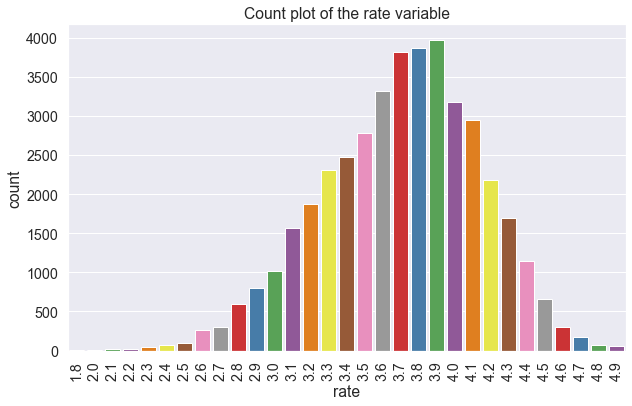

In [20]:
sns.countplot(data['rate'], palette='Set1')
plt.title("Count plot of the rate variable")
plt.xticks(rotation = 90)
plt.show()

# <b>5 <span style='color:#0000FF'>|</span> Exploratory Data Analysis</b>

In [21]:
data.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,cost_per_two,reviews_list,menu_item,type,city
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300.0,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600.0,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [22]:
# Python program to generate WordCloud

# importing all necessary modules
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd

def WordCloud_analysis(col):
    
    global data
    comment_words = ''
    stopwords = set(STOPWORDS)

    # iterate through the csv file
    for val in data[col]:

        # typecaste each val to string
        val = str(val)

        # split the value
        tokens = val.split()

        # Converts each token into lowercase
        for i in range(len(tokens)):
            tokens[i] = tokens[i].lower()

        comment_words += " ".join(tokens)+" "

    wordcloud = WordCloud(width = 800, height = 800,
                    background_color ='white',
                    stopwords = stopwords,
                    min_font_size = 10).generate(comment_words)

    # plot the WordCloud image					
    plt.figure(figsize = (8, 8), facecolor = None)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad = 0)

    plt.show()


<div style="color:yellow;display:fill;border-radius:8px;
            background-color:#0000FF;font-size:200%;
            font-family:Nexa;letter-spacing:0.5px">
    <p style="padding: 8px
;color:white;"><b>Numerical Features </b></p>
</div>. 

- **votes**
- **Cost_per_two**

## <b><span style='color:#0000FF'>1.</span> ` votes` </b>

In [23]:
data[['votes']].describe().T

,count,mean,std,min,25%,50%,75%,max
votes,49440.0,296.763451,819.779986,0.0,9.0,47.0,212.0,16832.0


<AxesSubplot:xlabel='votes'>

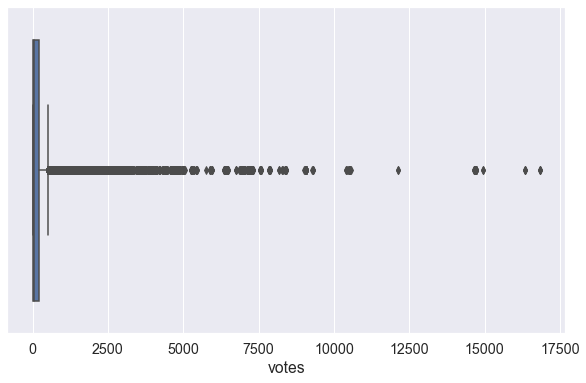

In [24]:
sns.boxplot(data.votes)

#### PLotting a joint plot for rate vs votes

 - Joint plot allows us to compare two different variables and see if there is any relationship between these two variables. By using joint plot we can do both univariate and bivariate analysis by plotting the scatter plot (bivariate) and distribution plot (univariate) of two different variables in a single plotting grid

 - Univariate analysis is the analysis of one (“uni”) variable. Bivariate analysis is the analysis of exactly two variables. Multivariate analysis is the analysis of more than two variables

<Figure size 1008x720 with 0 Axes>

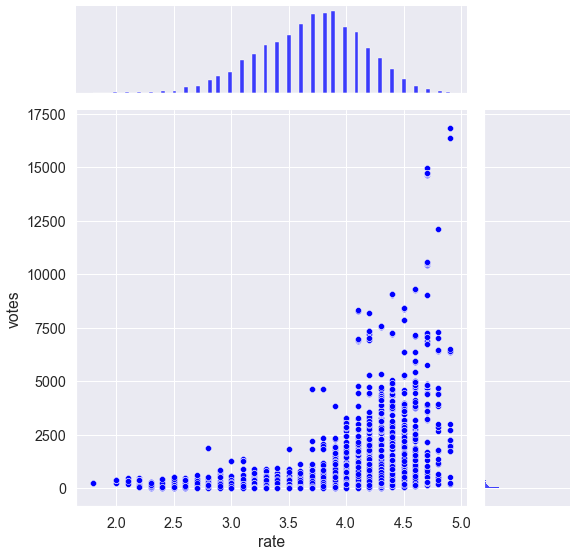

In [25]:
plt.figure(figsize=(14,10))
sns.set_style("darkgrid")
sns.jointplot(x = 'rate', y = 'votes', data=data, color = 'blue',height = 8, ratio = 4)

<p style= "font-family:Georgia;color:#000000;font-size:110%;text-align:center;border-radius:10px 10px;border-style: solid;border-width:5px;border-color:#fbff00;"><br><b>From the scatter plot we can see that the restaurants with higher number of rating has more votes. The distribution plot of votes on the right side indicates that the majority of votes pooled lie in bucket of 1000-2500 </b><br>
    <br></p>

## <b><span style='color:#0000FF'>2.</span> ` Cost Per Two Persons` </b>

In [26]:
data[['cost_per_two']].describe().T

,count,mean,std,min,25%,50%,75%,max
cost_per_two,49099.0,561.224567,443.454428,40.0,300.0,400.0,700.0,6000.0


<AxesSubplot:xlabel='cost_per_two'>

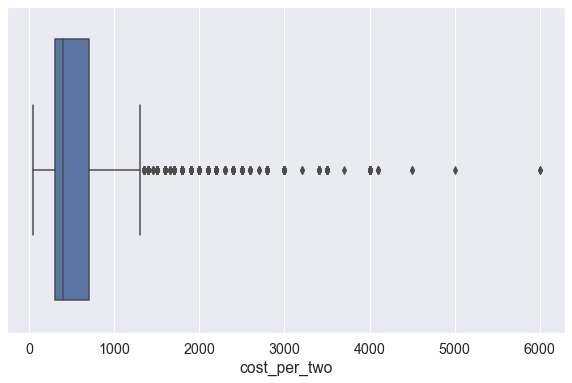

In [27]:
sns.boxplot(data.cost_per_two)

In [28]:
data[data['cost_per_two']>2000][['rate','cost_per_two']].sort_values(by='rate',ascending=False)

,rate,cost_per_two
35709,4.8,2100.0
26817,4.8,2100.0
35644,4.8,2100.0
34728,4.8,2100.0
32880,4.8,2100.0
32165,4.8,2100.0
30389,4.8,2100.0
30337,4.8,2100.0
29470,4.8,2100.0
27699,4.8,2100.0


<Figure size 1008x720 with 0 Axes>

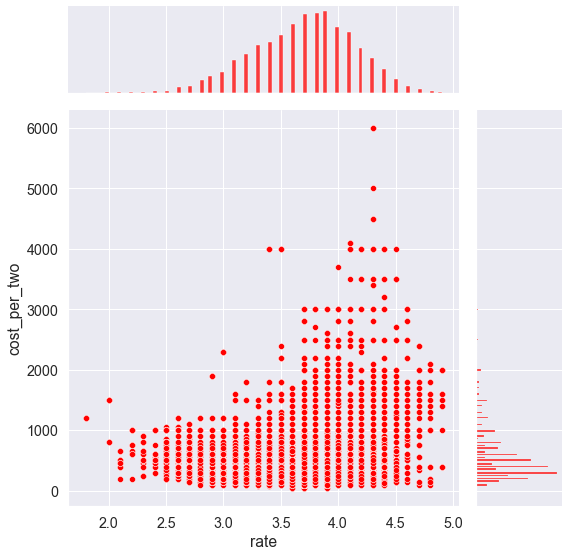

In [29]:
plt.figure(figsize=(14,10))
sns.set_style("darkgrid")
sns.jointplot(x = 'rate', y = 'cost_per_two', data=data, color = 'red',height = 8, ratio = 4)

<p style= "font-family:Georgia;color:#000000;font-size:110%;text-align:center;border-radius:10px 10px;border-style: solid;border-width:5px;border-color:#fbff00;"><br><b>From the scatter plot we can see that the restaurants with higher number of rating has more cost, but we see that ratings between 4 and 4.5 have the highest price</b><br>
    <br></p>

<div style="color:yellow;display:fill;border-radius:8px;
            background-color:#0000FF;font-size:200%;
            font-family:Nexa;letter-spacing:0.5px">
    <p style="padding: 8px
;color:white;"><b>  Categorical Features </b></p>
</div>. 

- name
- online_order
- book_table
- location
- rest_type
- dish_liked
- menu_item
- type
- city

## <b><span style='color:#0000FF'></span> ` Online Order` </b>

In [30]:
data.online_order.value_counts(normalize=True)

Yes    0.593487
No     0.406513
Name: online_order, dtype: float64

#### - Online orders' resturants are more than others and have percent nearly 60%.

Text(0.5, 1.0, 'Restaurants delivering online or not')

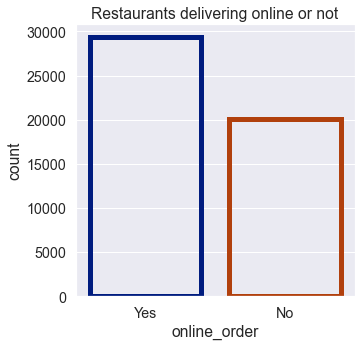

In [31]:
sns.countplot(data['online_order'],facecolor = (0,0,0,0),linewidth = 5,
                  edgecolor= sns.color_palette('dark',3))
fig=plt.gcf()
fig.set_size_inches(5,5)
plt.title('Restaurants delivering online or not')



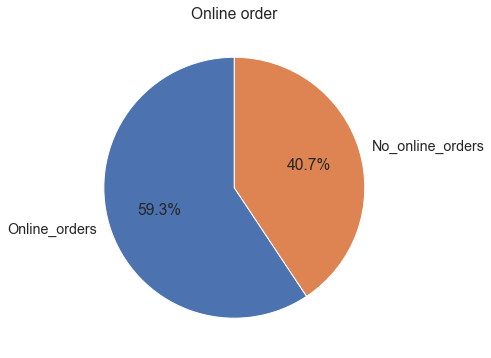

In [32]:
labels = ['Online_orders', 'No_online_orders']
values = data['online_order'].value_counts().values
fig1, ax1 = plt.subplots()
ax1.pie(values, labels=labels,startangle=90,autopct = '%1.1f%%',labeldistance= 1.1)
plt.title('Online order')
plt.show()

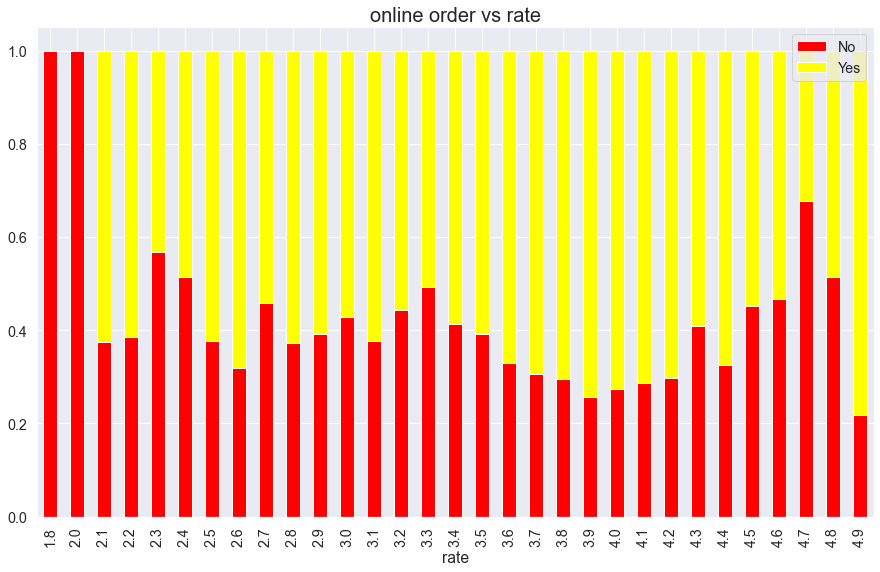

In [33]:
# X[['online_order','rate']].groupby(['rate']).sum(axis=0)
plt.rcParams['figure.figsize'] = (15, 9)
x = pd.crosstab(data['rate'], data['online_order'])
x.div(x.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True,color=['red','yellow'])
plt.title('online order vs rate', fontweight = 30, fontsize = 20)
plt.legend(loc="upper right")
plt.show()

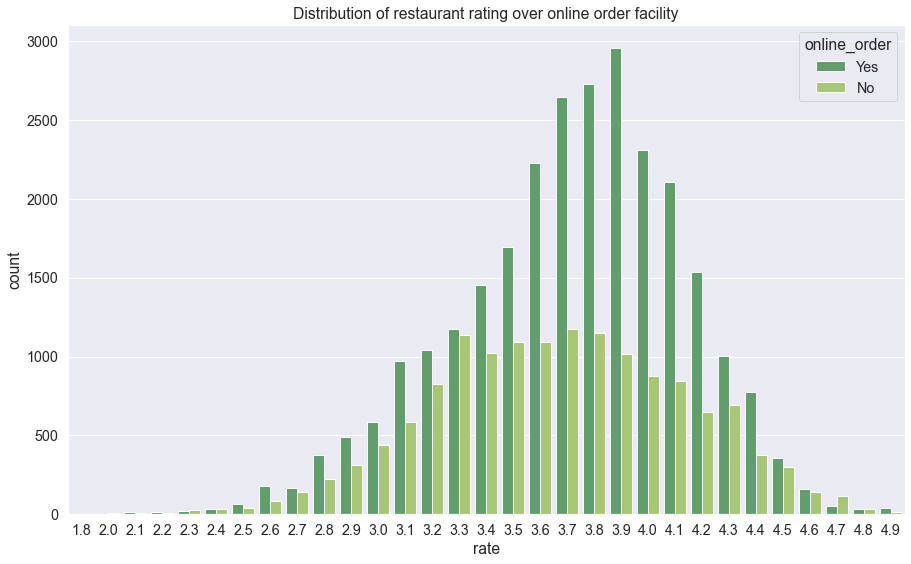

In [34]:
sns.countplot(x = data['rate'], hue = data['online_order'], palette= 'summer')
plt.title("Distribution of restaurant rating over online order facility")
plt.show()

<p style= "font-family:Georgia;color:#000000;font-size:110%;text-align:center;border-radius:10px 10px;border-style: solid;border-width:5px;border-color:#fbff00;"><br><b>We can clearly observer If the restaurant which don't have online order facility are more like to lose the rating as compared to the restuarants which have online order facility</b><br>
    <br></p>

## <b><span style='color:#0000FF'></span> ` book table` </b>

### Restaurants allowing table booking or not !?

In [35]:
data.book_table.value_counts(normalize=True)

No     0.872168
Yes    0.127832
Name: book_table, dtype: float64

#### - Booking tables' resturants are more than others and have percent nearly 87.2%.

Text(0.5, 1.0, 'Restaurants allowing table booking or not')

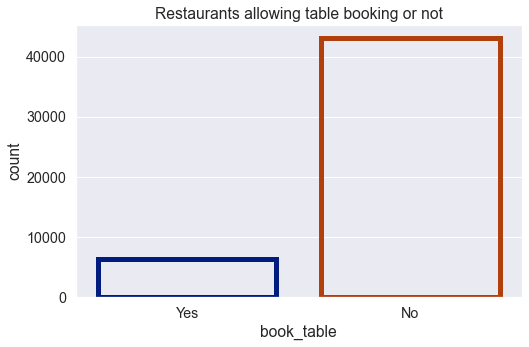

In [36]:
sns.countplot(data['book_table'],facecolor = (0,0,0,0),linewidth = 5,
                  edgecolor= sns.color_palette('dark',3))
fig=plt.gcf()
fig.set_size_inches(8,5)
plt.title('Restaurants allowing table booking or not')

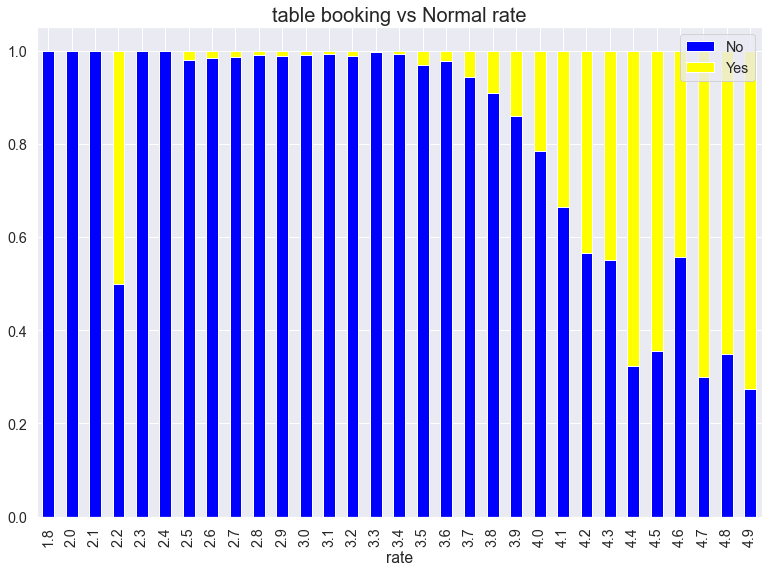

In [37]:
plt.rcParams['figure.figsize'] = (13, 9)
Y = pd.crosstab(data['rate'], data['book_table'])
Y.div(Y.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True,color=['blue','yellow'])
plt.title('table booking vs Normal rate', fontweight = 30, fontsize = 20)
plt.legend(loc="upper right")
plt.show()

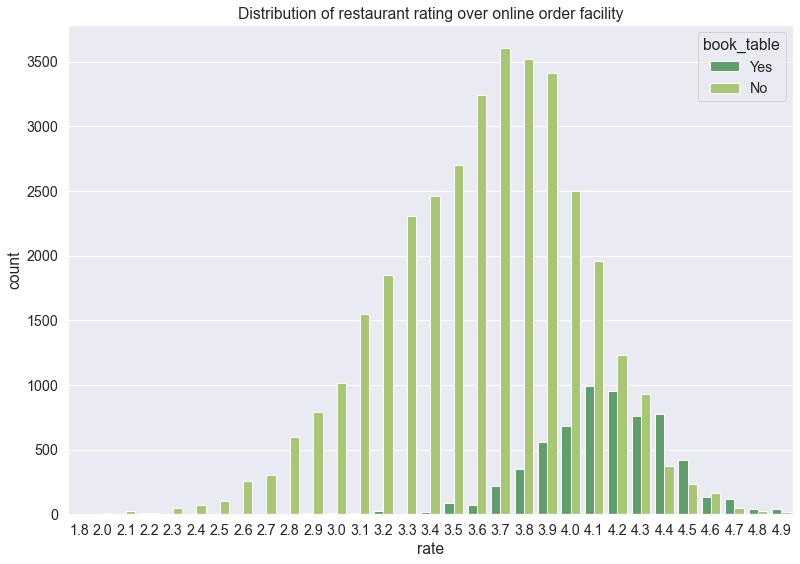

In [38]:
sns.countplot(x = data['rate'], hue = data['book_table'], palette= 'summer')
plt.title("Distribution of restaurant rating over online order facility")
plt.show()

## <b><span style='color:#0000FF'></span> `Restaurant type` </b>

#### Restaurant type distribution plot


Text(0.5, 1.0, 'rest_type')

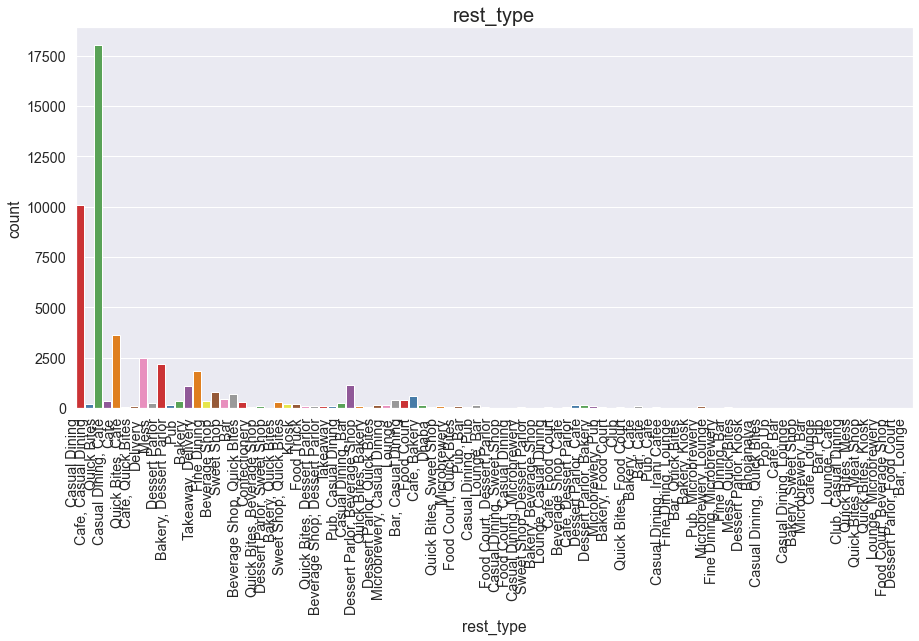

In [39]:
plt.rcParams['figure.figsize'] = 15,7
g = sns.countplot(x="rest_type",data=data, palette = "Set1")
g.set_xticklabels(g.get_xticklabels(), rotation=90, ha="right")
plt.title('rest_type',size = 20)

#### The restaurant which is more famous amongst people are Cafe Coffee Day

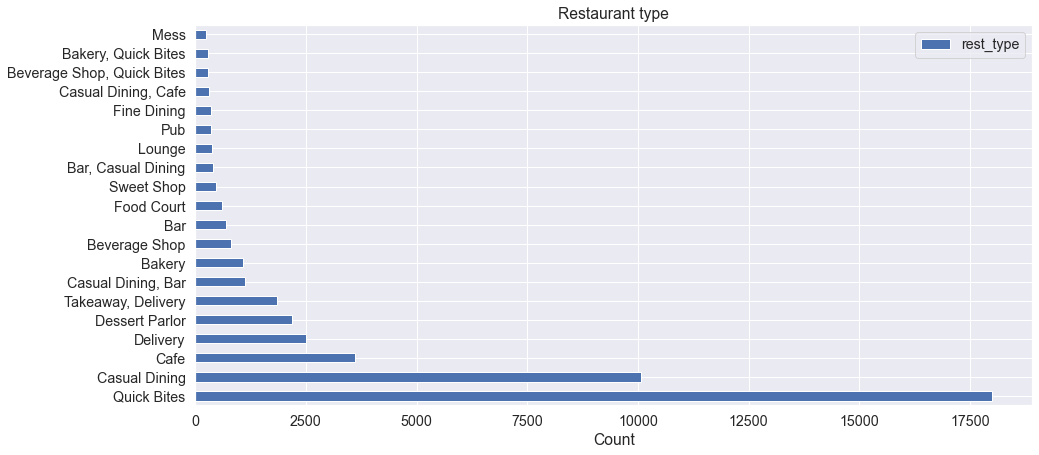

In [40]:
data.rest_type.value_counts().nlargest(20).plot(kind = 'barh')
plt.title("Restaurant type")
plt.xlabel("Count")
plt.legend()
plt.show()

<p style= "font-family:Georgia;color:#000000;font-size:110%;text-align:center;border-radius:10px 10px;border-style: solid;border-width:5px;border-color:#fbff00;"><br> From the above visuals shows the top 20 restaurant type. We can see that the restaurant type <b>Quick Bites</b> is more popular among people as compared to the rest of the restaurant types.<br>
    

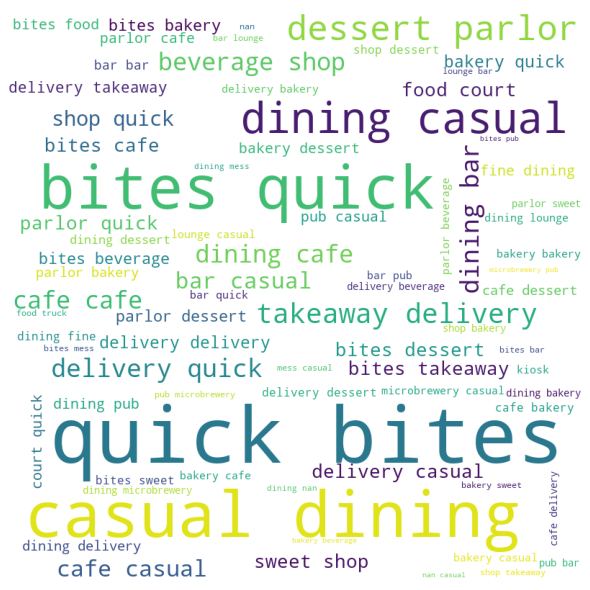

In [41]:
WordCloud_analysis('rest_type')

## <b><span style='color:#0000FF'></span> `City` </b>

Text(0.5, 1.0, 'Location wise count for restaurants')

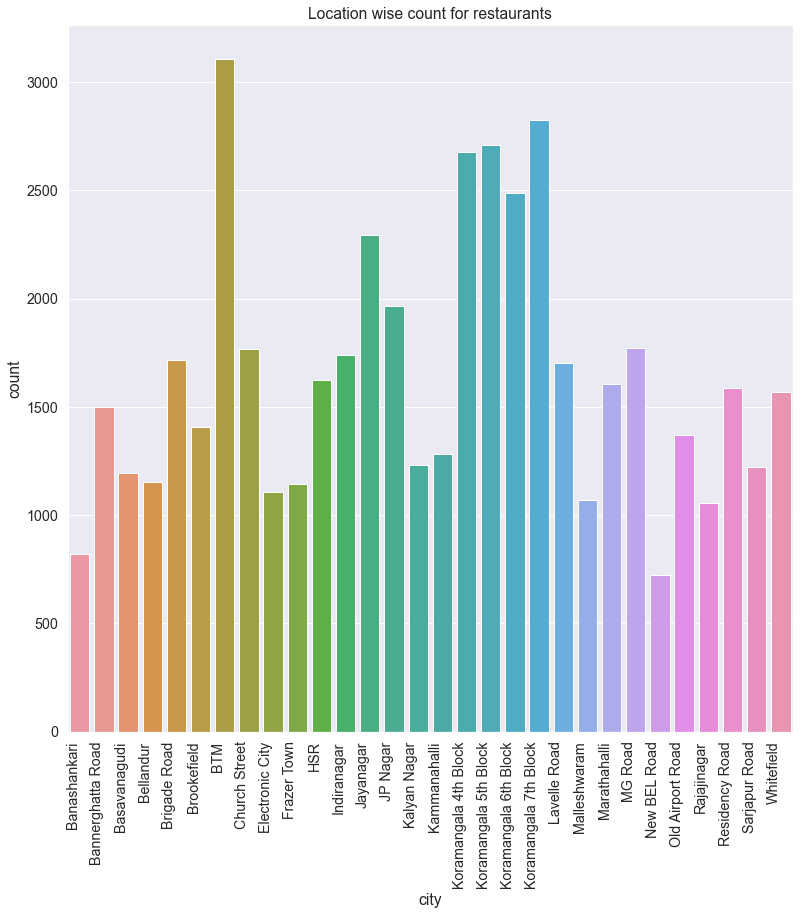

In [42]:
sns.countplot(data['city'])
sns.countplot(data['city']).set_xticklabels(sns.countplot(data['city']).get_xticklabels(), rotation=90, ha="right")
fig = plt.gcf()
fig.set_size_inches(13,13)
plt.title('Location wise count for restaurants')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 [Text(0, 0, 'Banashankari'),
  Text(1, 0, 'Bannerghatta Road'),
  Text(2, 0, 'Basavanagudi'),
  Text(3, 0, 'Bellandur'),
  Text(4, 0, 'Brigade Road'),
  Text(5, 0, 'Brookefield'),
  Text(6, 0, 'BTM'),
  Text(7, 0, 'Church Street'),
  Text(8, 0, 'Electronic City'),
  Text(9, 0, 'Frazer Town'),
  Text(10, 0, 'HSR'),
  Text(11, 0, 'Indiranagar'),
  Text(12, 0, 'Jayanagar'),
  Text(13, 0, 'JP Nagar'),
  Text(14, 0, 'Kalyan Nagar'),
  Text(15, 0, 'Kammanahalli'),
  Text(16, 0, 'Koramangala 4th Block'),
  Text(17, 0, 'Koramangala 5th Block'),
  Text(18, 0, 'Koramangala 6th Block'),
  Text(19, 0, 'Koramangala 7th Block'),
  Text(20, 0, 'Lavelle Road'),
  Text(21, 0, 'Malleshwaram'),
  Text(22, 0, 'Marathahalli'),
  Text(23, 0, 'MG Road'),
  Text(24, 0, 'New BEL Road'),
  Text(25, 0, 'Old Airport Road'),
  Text(26, 0, 'Rajajinagar'),
  Text(27, 0, 'Residenc

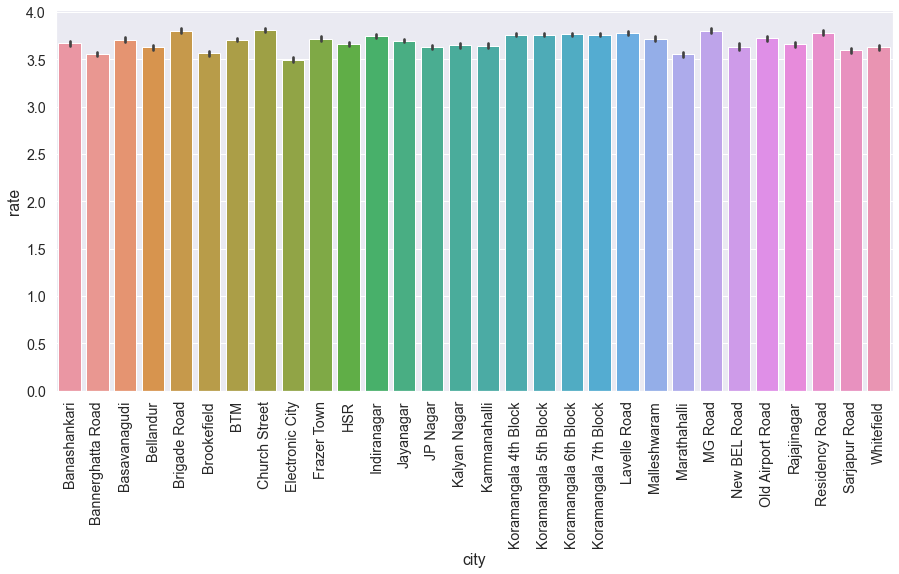

In [43]:
sns.barplot(data=data,x='city',y='rate')
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 [Text(0, 0, 'Banashankari'),
  Text(1, 0, 'Bannerghatta Road'),
  Text(2, 0, 'Basavanagudi'),
  Text(3, 0, 'Bellandur'),
  Text(4, 0, 'Brigade Road'),
  Text(5, 0, 'Brookefield'),
  Text(6, 0, 'BTM'),
  Text(7, 0, 'Church Street'),
  Text(8, 0, 'Electronic City'),
  Text(9, 0, 'Frazer Town'),
  Text(10, 0, 'HSR'),
  Text(11, 0, 'Indiranagar'),
  Text(12, 0, 'Jayanagar'),
  Text(13, 0, 'JP Nagar'),
  Text(14, 0, 'Kalyan Nagar'),
  Text(15, 0, 'Kammanahalli'),
  Text(16, 0, 'Koramangala 4th Block'),
  Text(17, 0, 'Koramangala 5th Block'),
  Text(18, 0, 'Koramangala 6th Block'),
  Text(19, 0, 'Koramangala 7th Block'),
  Text(20, 0, 'Lavelle Road'),
  Text(21, 0, 'Malleshwaram'),
  Text(22, 0, 'Marathahalli'),
  Text(23, 0, 'MG Road'),
  Text(24, 0, 'New BEL Road'),
  Text(25, 0, 'Old Airport Road'),
  Text(26, 0, 'Rajajinagar'),
  Text(27, 0, 'Residenc

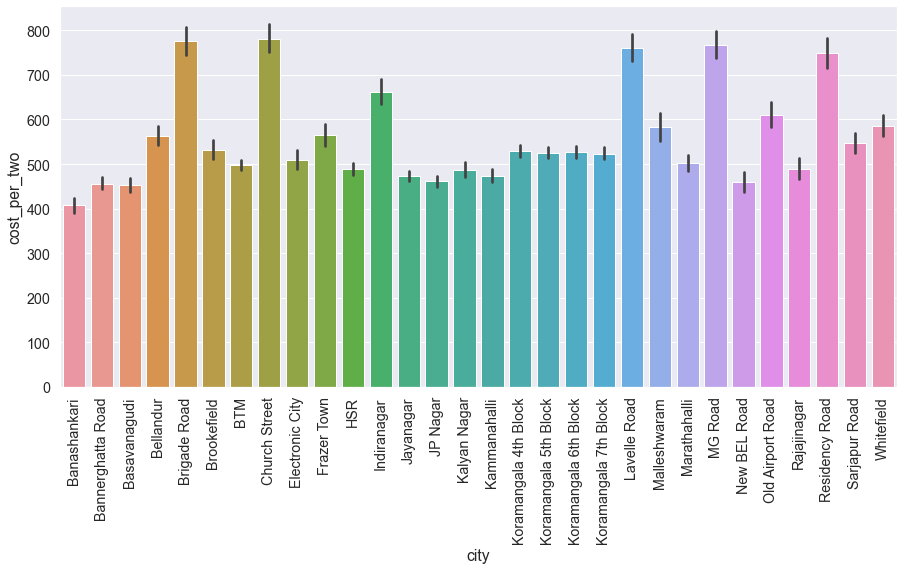

In [44]:
sns.barplot(data=data,x='city',y='cost_per_two')
plt.xticks(rotation=90)

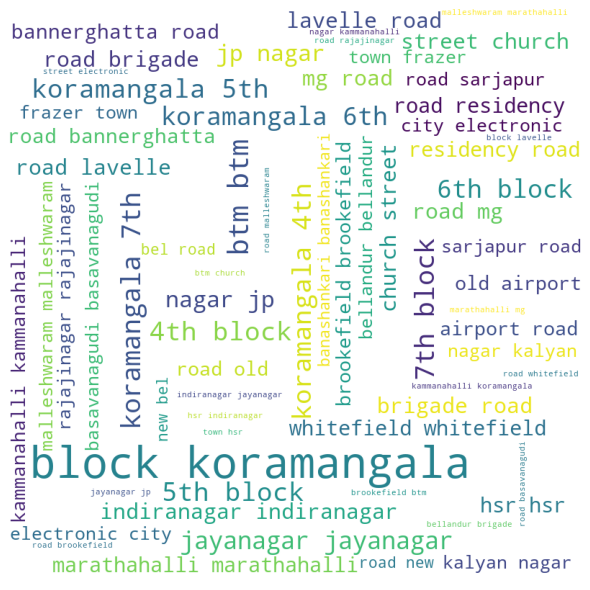

In [45]:
WordCloud_analysis('city')

## <b><span style='color:#0000FF'></span> `Types of Services` </b>

Text(0.5, 1.0, 'Type of Service')

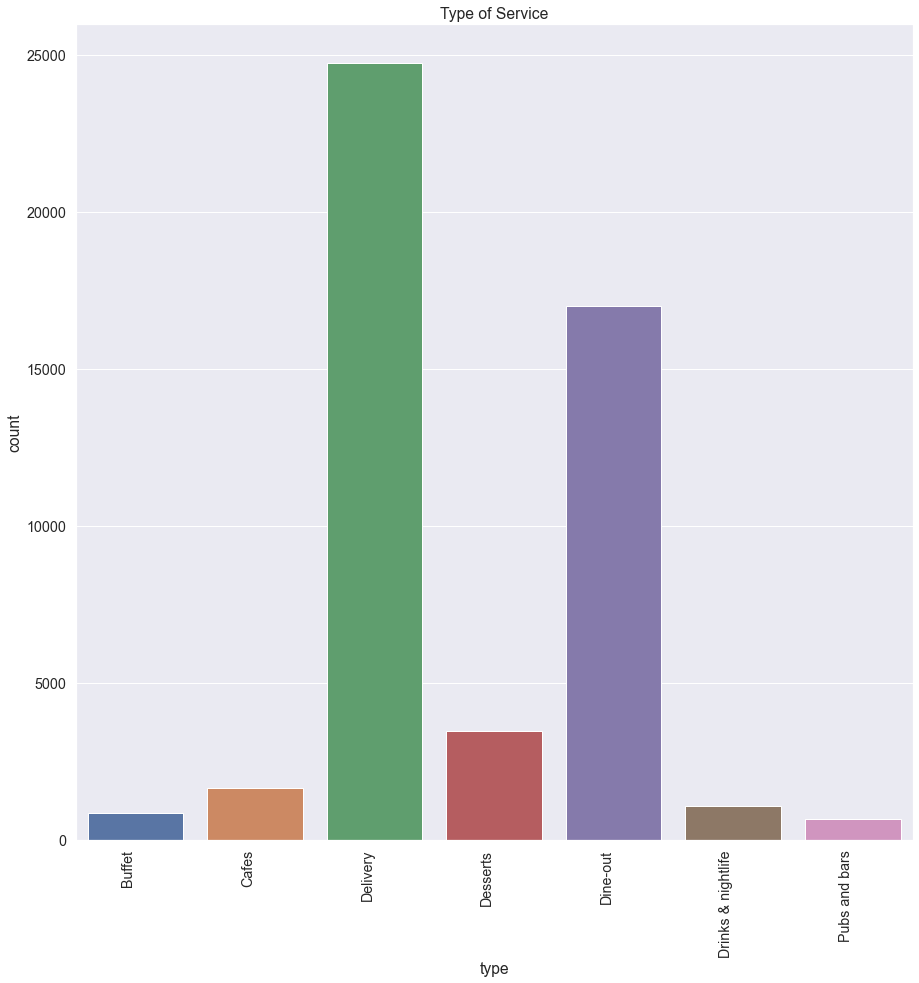

In [46]:
sns.countplot(data['type'])
sns.countplot(data['type']).set_xticklabels(sns.countplot(data['type']).get_xticklabels(), rotation=90, ha="right")
fig = plt.gcf()
fig.set_size_inches(15,15)
plt.title('Type of Service')

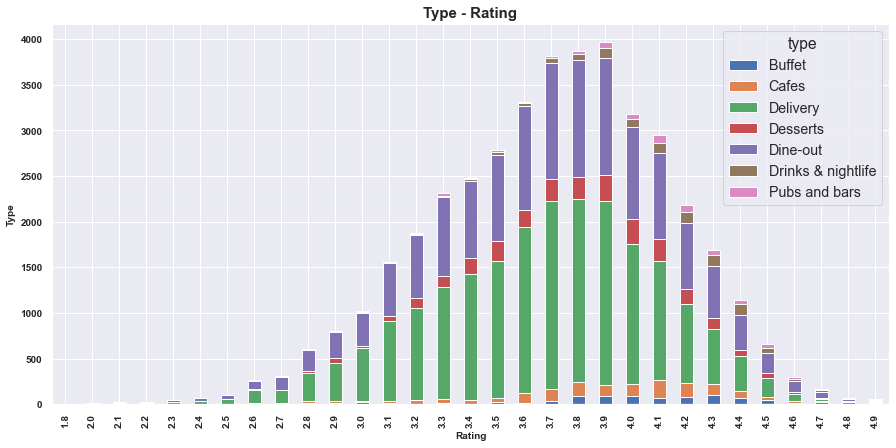

In [47]:
type_plt=pd.crosstab(data['rate'],data['type'])
type_plt.plot(kind='bar',stacked=True);
plt.title('Type - Rating',fontsize=15,fontweight='bold')
plt.ylabel('Type',fontsize=10,fontweight='bold')
plt.xlabel('Rating',fontsize=10,fontweight='bold')
plt.xticks(fontsize=10,fontweight='bold')
plt.yticks(fontsize=10,fontweight='bold');

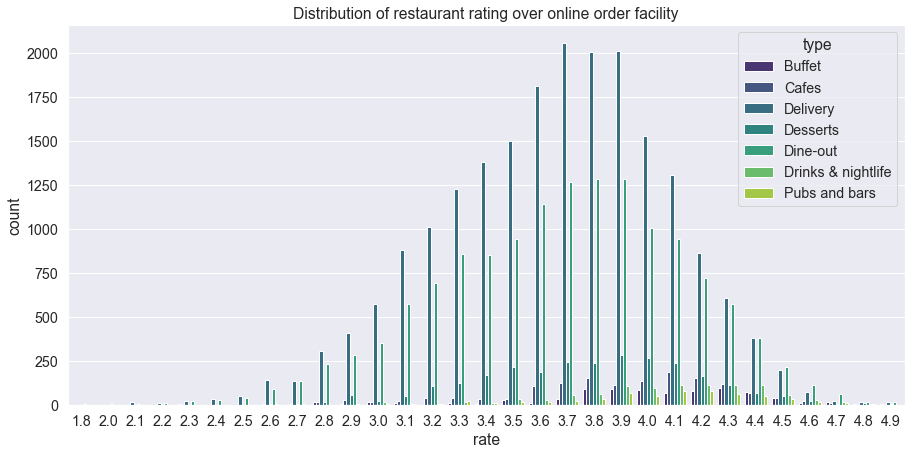

In [48]:
sns.countplot(x = data['rate'], hue = data['type'], palette= 'viridis')
plt.title("Distribution of restaurant rating over online order facility")
plt.show()

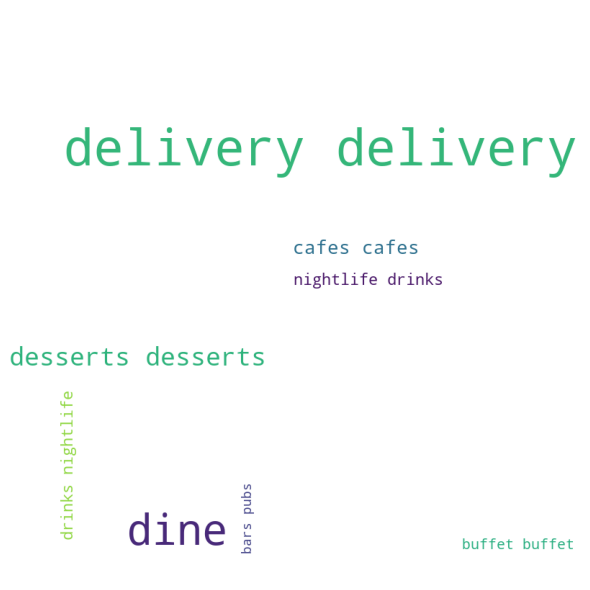

In [49]:
WordCloud_analysis('type')

## <b><span style='color:#0000FF'></span> `Location` </b>

#### No.of Restaurants in a Location



In [50]:
data.location.value_counts()[:10]

BTM                      4793
Koramangala 5th Block    2442
HSR                      2414
JP Nagar                 2103
Whitefield               2033
Indiranagar              1994
Jayanagar                1851
Marathahalli             1786
Bannerghatta Road        1541
Bellandur                1220
Name: location, dtype: int64

Text(0.5, 1.0, 'NO. of restaurants in a Location')

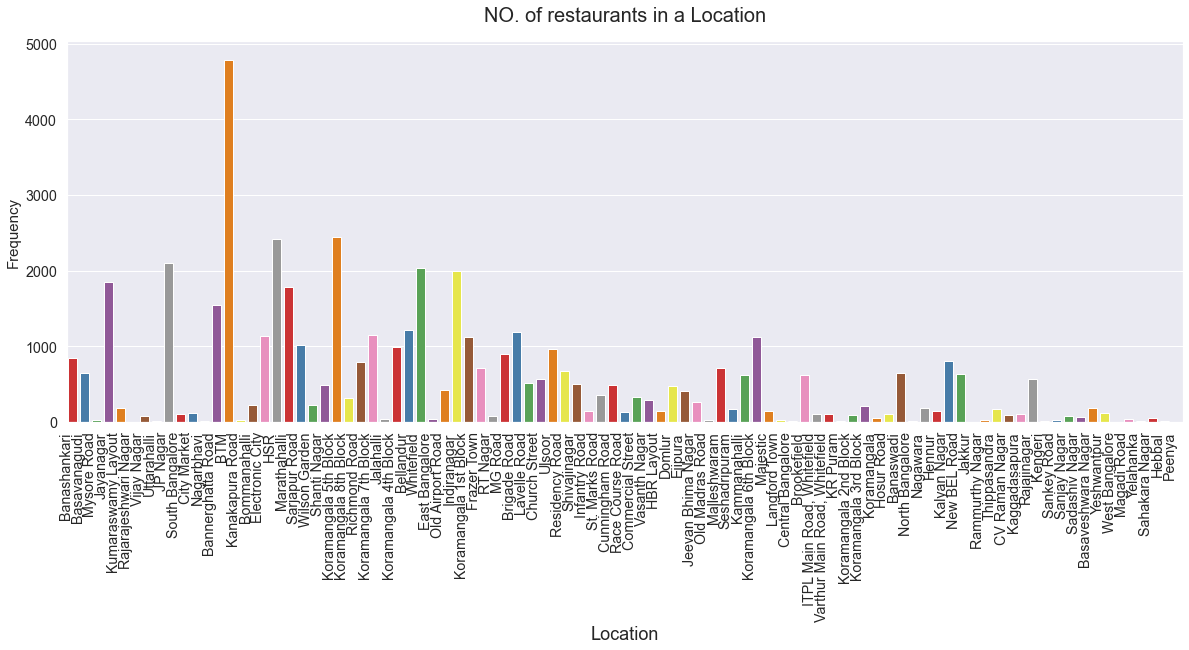

In [51]:
fig = plt.figure(figsize=(20,7))
loc = sns.countplot(x="location",data=data, palette = "Set1")
loc.set_xticklabels(loc.get_xticklabels(), rotation=90, ha="right")
plt.ylabel("Frequency",size=15)
plt.xlabel("Location",size=18)
plt.title('NO. of restaurants in a Location',size = 20,pad=20)

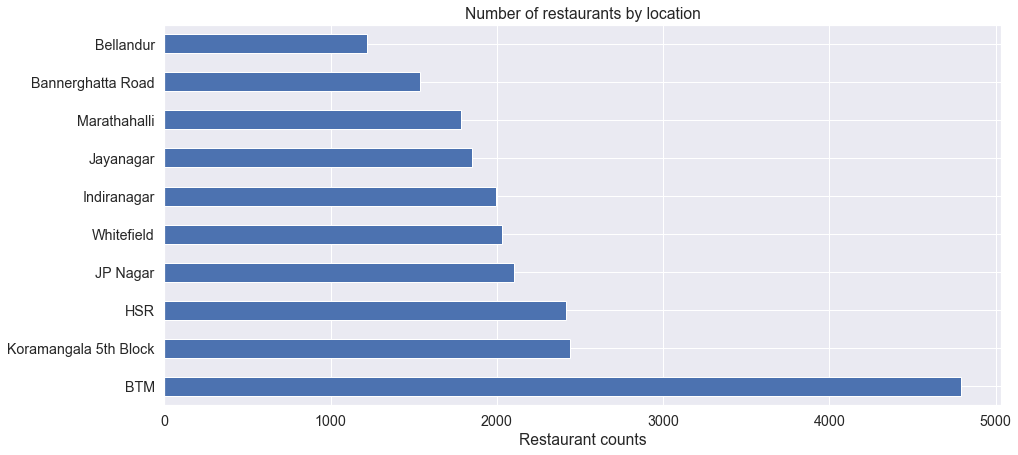

In [52]:
data.location.value_counts()[:10].plot(kind='barh')
plt.title("Number of restaurants by location")
plt.xlabel("Restaurant counts")
plt.show()

<p style= "font-family:Georgia;color:#000000;font-size:110%;text-align:center;border-radius:10px 10px;border-style: solid;border-width:5px;border-color:#fbff00;"><br><b>From the above visualization we can say that most number of the restaurants are located at BTM which makes it most popular residential and commercial and residential places in Banglore.</b><br>
    <br></p>

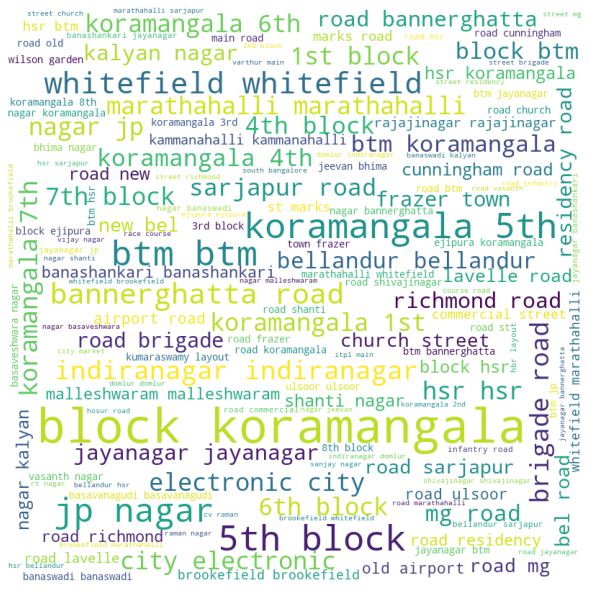

In [53]:
WordCloud_analysis('location')

## <b><span style='color:#0000FF'></span> `Name` </b>

### Most famous Restaurant chains in Bengalur


In [54]:
data.name.value_counts()[:10]

Cafe Coffee Day      93
Onesta               85
Just Bake            72
Five Star Chicken    70
Empire Restaurant    69
Kanti Sweets         68
Baskin Robbins       63
Polar Bear           62
Chef Baker's         62
Petoo                62
Name: name, dtype: int64

Text(0.5, 0, 'Number of outlets')

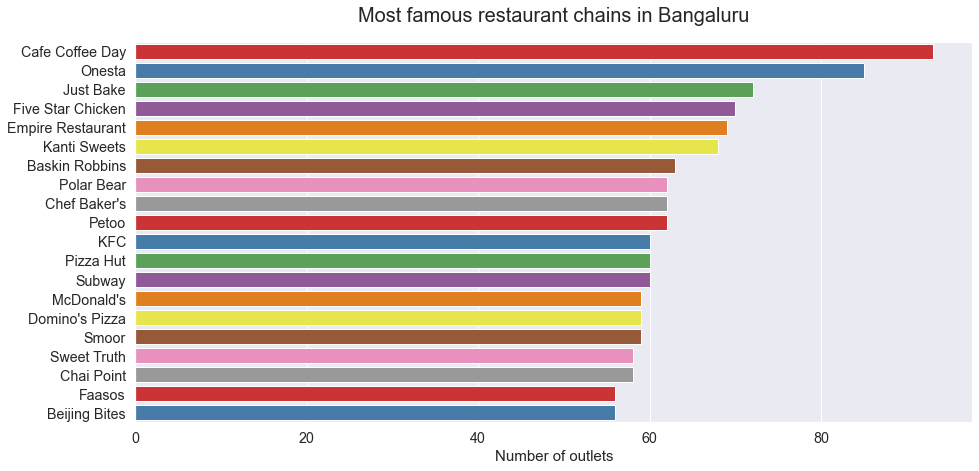

In [55]:
plt.figure(figsize=(15,7))
chains=data['name'].value_counts()[:20]
sns.barplot(x=chains,y=chains.index,palette='Set1')
plt.title("Most famous restaurant chains in Bangaluru",size=20,pad=20)
plt.xlabel("Number of outlets",size=15)

### Comparing Biggest Restaurant Chain and Best Restaurant Chain

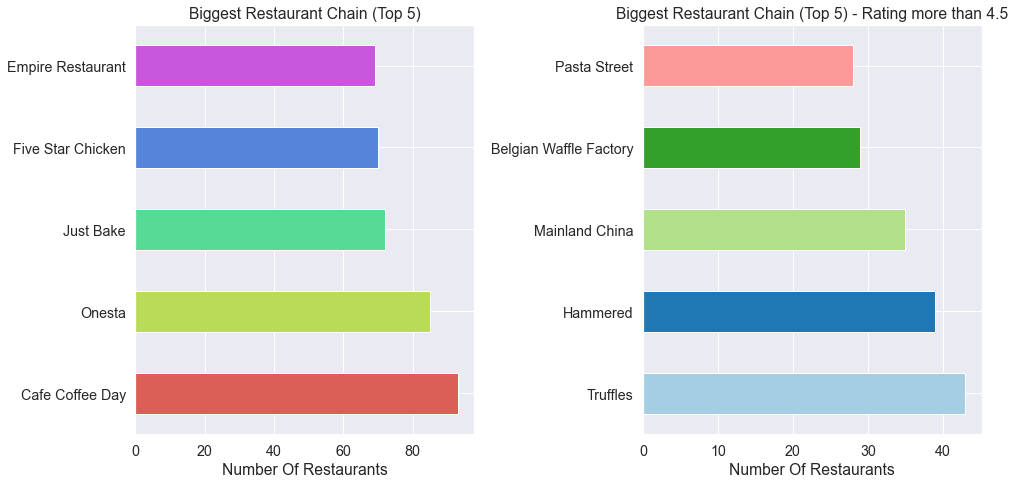

In [56]:
plt.rcParams['figure.figsize'] = 14,7

plt.subplot(1,2,1)
data.name.value_counts().head().plot(kind = 'barh', color = sns.color_palette("hls", 5))
plt.xlabel("Number Of Restaurants")
plt.title("Biggest Restaurant Chain (Top 5)")

plt.subplot(1,2,2)
data[data['rate'] >= 4.5]['name'].value_counts().nlargest(5).plot(kind = 'barh', color = sns.color_palette("Paired"))
plt.xlabel("Number Of Restaurants")
plt.title("Biggest Restaurant Chain (Top 5) - Rating more than 4.5")
plt.tight_layout()

<p style= "font-family:Georgia;color:#000000;font-size:110%;text-align:left;border-radius:10px 10px;border-style: solid;border-width:5px;border-color:#fbff00;"><br><b> - Cafe Coffee Day chain has over 90 cafes across the city that are listed in Zomato. On the other hand, Truffles - a burger chain has the best fast food restaurant (rating more than 4.5 out of 100), quality over quantity.</b><br>
<br><b> - If you visit Banglore next time and if you want to check out a good restaurant over a weekend dont forget to try the food at Truffles, Hammered and Mainland China.</b><br>    
    <br></p>

## <b><span style='color:#0000FF'></span> `dish_liked` </b>

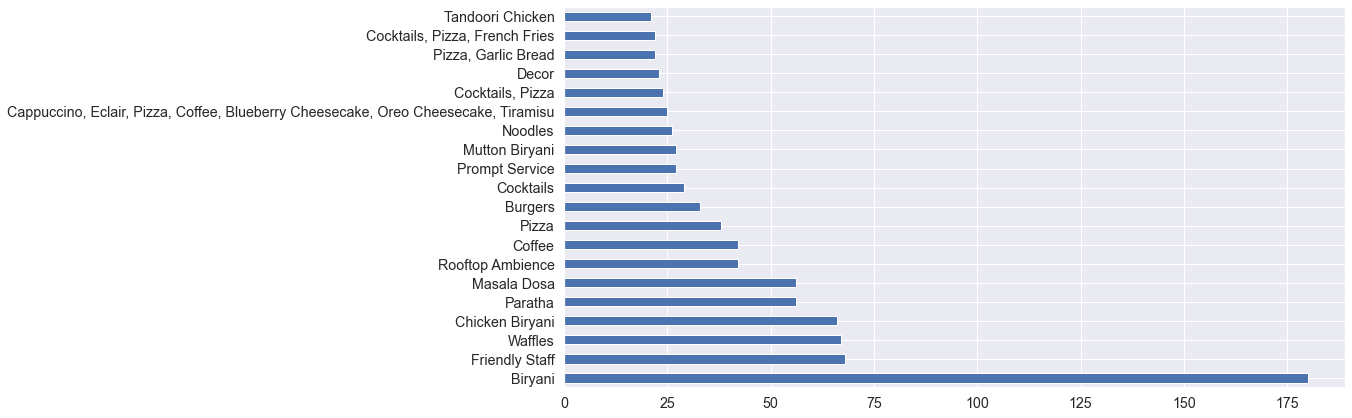

In [57]:
data.dish_liked.value_counts().nlargest(20).plot(kind = 'barh')
plt.show()

<p style= "font-family:Georgia;color:#000000;font-size:110%;text-align:center;border-radius:10px 10px;border-style: solid;border-width:5px;border-color:#fbff00;"><br> We are able to see the top 20 dish's liked by the people. In this graph we can clearly see that the dish <b>Biryani</b> gains the top most position as compared to the rest of the dishes<br>
    

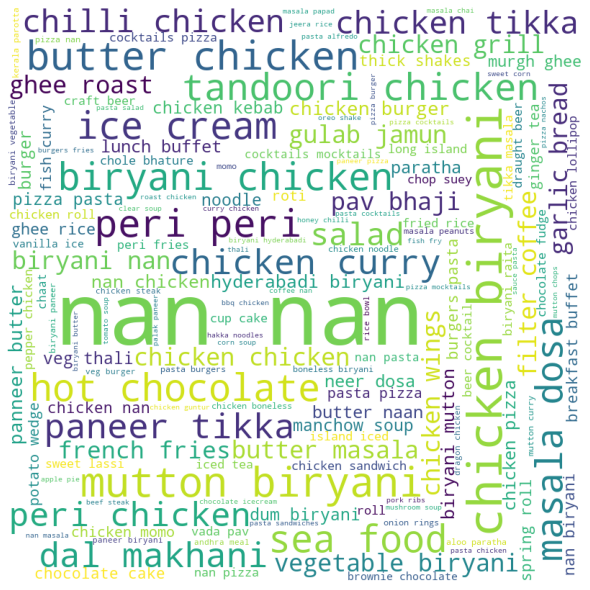

In [58]:
WordCloud_analysis('dish_liked')

# <b>6<span style='color:#0000FF'>|</span> Data Preprocessing</b>

- If you look closely at each column of the dataframe closely you will notice that there are some columns that won't contribute to the ratings and reviews. The **url** or the full **name** of the restaurant or their **phone number** can't justify their ratings or reviews.

- Also, menu_item has nearly 70% of column has no data (null) so i drop it

- Note that only the address column can be used to know **lat_** and **long** from geogy library and then drop it .

- Also, **location** and **listed_in(city)** are the same columns.So, we **drop the location column**.

- The names of columns are a bit non descriptive and confusing so its better to **rename** some of these columns.

In [59]:
data.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'cost_per_two', 'reviews_list', 'menu_item', 'type', 'city'],
      dtype='object')

## <b>1.<span style='color:#0000FF'></span> `Dropping unnessary columns` </b>

In [60]:
## dropping some columns
data.drop(columns=['url','address','name','phone','dish_liked','location','menu_item','reviews_list'],axis=1,inplace=True)
data.head()

,online_order,book_table,rate,votes,rest_type,cuisines,cost_per_two,type,city
0,Yes,Yes,4.1,775,Casual Dining,"North Indian, Mughlai, Chinese",800.0,Buffet,Banashankari
1,Yes,No,4.1,787,Casual Dining,"Chinese, North Indian, Thai",800.0,Buffet,Banashankari
2,Yes,No,3.8,918,"Cafe, Casual Dining","Cafe, Mexican, Italian",800.0,Buffet,Banashankari
3,No,No,3.7,88,Quick Bites,"South Indian, North Indian",300.0,Buffet,Banashankari
4,No,No,3.8,166,Casual Dining,"North Indian, Rajasthani",600.0,Buffet,Banashankari


## <b>1.<span style='color:#0000FF'></span> `Removing null values` </b>

In [61]:
# dropping the null value from the dataset
data.dropna(how='any',inplace=True)

In [62]:
data.isnull().sum()

online_order    0
book_table      0
rate            0
votes           0
rest_type       0
cuisines        0
cost_per_two    0
type            0
city            0
dtype: int64

## <b>2. <span style='color:#0000FF'></span> `Encoding` </b>

#### Label Encoding

In [63]:
label_Encoder_cols=['rest_type','cuisines','type','city']

In [64]:
encoder=LabelEncoder()

## save all results at list
all_results=[]

# Iterate over all the values of each column and extract their dtypes
for col in label_Encoder_cols:
        # Compare if the dtype is object
    if data[col].dtypes=='object':
    # Use LabelEncoder to do the numeric transformation
        data[col]=encoder.fit_transform(data[col])
        values=list(range(1,data[col].nunique()))
        keys=list(encoder.inverse_transform(values))

        # to convert lists to dictionary
        result = dict(zip(keys,values))
        all_results.append(result)
        
        # Printing sample dictionary
        #print(f" {col} dictionary is : " + str(result))

In [65]:
rest_type,cuisines,type,city=all_results
## show type dictinary
type

{'Cafes': 1,
 'Delivery': 2,
 'Desserts': 3,
 'Dine-out': 4,
 'Drinks & nightlife': 5,
 'Pubs and bars': 6}

In [66]:
data['book_table']=data['book_table'].replace({'Yes':1,'No':0})
data['online_order']=data['online_order'].replace({'Yes':1,'No':0})

#### Target Encoding 

In [67]:
data['rate']=data['rate'].apply(lambda x : 1 if x > 3.7 else 0)

In [68]:
data['rate'].value_counts()

0    21185
1    20078
Name: rate, dtype: int64

In [69]:
data.head()

,online_order,book_table,rate,votes,rest_type,cuisines,cost_per_two,type,city
0,1,1,1,775,24,1894,800.0,0,1
1,1,0,1,787,24,816,800.0,0,1
2,1,0,1,918,19,653,800.0,0,1
3,0,0,0,88,73,2221,300.0,0,1
4,0,0,1,166,24,1921,600.0,0,1


# <b>7<span style='color:#0000FF'>|</span> Split Dataset for Training and Testing </b>

In [70]:
data.columns

Index(['online_order', 'book_table', 'rate', 'votes', 'rest_type', 'cuisines',
       'cost_per_two', 'type', 'city'],
      dtype='object')

In [71]:
features = data.drop(columns =['rate'], axis = 1)
target = data['rate']

In [72]:
x_train, x_test, y_train, y_test = train_test_split(features, target, shuffle = True, test_size = 0.2, random_state = 155)

In [73]:
print('Shape of training feature:', x_train.shape)
print('Shape of testing feature:', x_test.shape)
print('Shape of training label:', y_train.shape)
print('Shape of training label:', y_test.shape)

Shape of training feature: (33010, 8)
Shape of testing feature: (8253, 8)
Shape of training label: (33010,)
Shape of training label: (8253,)


# <b>8<span style='color:#0000FF'>|</span> Standrization </b>

In [74]:
Scaler = StandardScaler()
Scaler.fit(x_train)

StandardScaler()

In [75]:
x_train = Scaler.transform(x_train)
x_test = Scaler.transform(x_test)

In [76]:
x_train[0]

array([-1.3829229 , -0.42865851, -0.3847416 ,  1.06259141,  0.65618546,
       -0.11558546, -0.68949772, -1.4864594 ])

# <b>9 <span style='color:#0000FF'>|</span> Modeling </b>

In [77]:
models = {
    "LR": LogisticRegression(),
    "KNN": KNeighborsClassifier(),
    "DT": DecisionTreeClassifier(),
    "RF": RandomForestClassifier(),
    "XGB": XGBClassifier(),
    "Naive Bayes": GaussianNB()
}

In [78]:
for name, model in models.items():
    print(f'Training Model {name} \n--------------')
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    print(f'Training Accuracy: {model.score(x_train, y_train)}')
    print(f'Testing Accuracy: {accuracy_score(y_test, y_pred)}')
    print(f'Testing Confusion Matrix: \n{confusion_matrix(y_test, y_pred)}')
    print(f'Testing Recall: {recall_score(y_test, y_pred)}')    
    print(f'Testing Precesion: {precision_score(y_test, y_pred)}')
    print(f'Testing F-1: {f1_score(y_test, y_pred)}')
    print(f'Testing F-Beta: {fbeta_score(y_test, y_pred, beta=0.5)}')
    print('-'*50)

Training Model LR 
--------------
Training Accuracy: 0.7700090881551045
Testing Accuracy: 0.770750030292015
Testing Confusion Matrix: 
[[3799  478]
 [1414 2562]]
Testing Recall: 0.6443661971830986
Testing Precesion: 0.8427631578947369
Testing F-1: 0.7303306727480047
Testing F-Beta: 0.7938770451165096
--------------------------------------------------
Training Model KNN 
--------------
Training Accuracy: 0.8538018782187216
Testing Accuracy: 0.7719617108930086
Testing Confusion Matrix: 
[[3546  731]
 [1151 2825]]
Testing Recall: 0.7105130784708249
Testing Precesion: 0.7944319460067492
Testing F-1: 0.7501327668613914
Testing F-Beta: 0.7760989010989011
--------------------------------------------------
Training Model DT 
--------------
Training Accuracy: 0.9998182368979097
Testing Accuracy: 0.9516539440203562
Testing Confusion Matrix: 
[[4070  207]
 [ 192 3784]]
Testing Recall: 0.9517102615694165
Testing Precesion: 0.9481332999248309
Testing F-1: 0.9499184134555041
Testing F-Beta: 0.948846

## <b><span style='color:#0000FF'></span> `Lazy Predicy Lib` </b>

In [96]:
# Running all the models
clf=LazyClassifier(verbose=0,ignore_warnings=True,custom_metric=None)
models,predictions=clf.fit(x_train,x_test,y_train,y_test)
models

 90%|█████████████████████████████████████████████████████████████████████████▌        | 26/29 [05:01<01:14, 24.67s/it]

[11:09:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [05:04<00:00, 10.49s/it]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
BaggingClassifier,0.96,0.96,0.96,0.96,1.00
DecisionTreeClassifier,0.95,0.95,0.95,0.95,0.21
RandomForestClassifier,0.95,0.95,0.95,0.95,3.96
ExtraTreesClassifier,0.92,0.92,0.92,0.92,4.44
XGBClassifier,0.91,0.91,0.91,0.91,2.18
LGBMClassifier,0.87,0.87,0.87,0.87,0.49
ExtraTreeClassifier,0.84,0.84,0.84,0.84,0.08
AdaBoostClassifier,0.82,0.82,0.82,0.82,1.50
SVC,0.79,0.78,0.78,0.78,86.76


## <b><span style='color:#0000FF'></span> `Apply the best model` </b>

In [79]:
## <b>2. <span style='color:#0000FF'></span> `Encoding` </b>def evaluate_model(model,x):
    model=model
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)

    # Calculate accuracy, precision, recall
    print(f'Training Accuracy: {model.score(x_train, y_train)}')
    print('_'*50)
    print('Accuracy Score: ', accuracy_score(y_test, y_pred))
    print('_'*50)
    print('Precision Score: ', precision_score(y_test, y_pred))
    print('_'*50)
    print('Recall Score: ', recall_score(y_test, y_pred))
    print('_'*50)
    print(classification_report(y_test,y_pred))
    print('_'*50)
    print('F1 Score: ',f1_score(y_test,y_pred))
    
    # Display confussion matrix
    plt.figure(figsize = (6,5))
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot = True,cmap=x, fmt = '.1f') # plot_kwargs = {'percent' : True}
    plt.xlabel('Predicted')
    plt.ylabel('True')

<div style="color:yellow;display:fill;border-radius:8px;
            background-color:#ffcc00;font-size:150%;
            font-family:Nexa;letter-spacing:0.5px">
    <p style="padding: 8px
;color:black;"><b>  Random Forest  </b></p>
</div>. 

Training Accuracy: 0.9998182368979097
__________________________________________________
Accuracy Score:  0.9477765660971768
__________________________________________________
Precision Score:  0.955772692208794
__________________________________________________
Recall Score:  0.9348591549295775
__________________________________________________
              precision    recall  f1-score   support

           0       0.94      0.96      0.95      4277
           1       0.96      0.93      0.95      3976

    accuracy                           0.95      8253
   macro avg       0.95      0.95      0.95      8253
weighted avg       0.95      0.95      0.95      8253

__________________________________________________
F1 Score:  0.9452002542911634


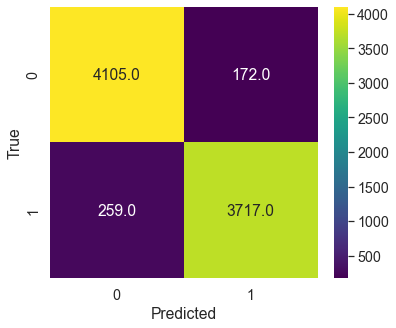

In [80]:
evaluate_model(RandomForestClassifier(),'viridis')

In [81]:
model=RandomForestClassifier()
model.fit(x_train,y_train)

RandomForestClassifier()

In [82]:
# save the model
joblib.dump(model, 'Zomato Restaurants') 

['Zomato Restaurants']

In [83]:
# save the scaler
joblib.dump(Scaler, 'scaler.h5') 

['scaler.h5']

<div style="color:yellow;display:fill;border-radius:8px;
            background-color:#0000FF;font-size:150%;
            font-family:Nexa;letter-spacing:0.5px">
    <p style="padding: 8px
;color:white;"><b> Random Forest | Cross_Validation   </b></p>
</div>. 

In [84]:
from sklearn.model_selection import cross_validate
model=RandomForestClassifier()
c_val = cross_validate(model, x_train, y_train, cv = 10 , scoring = ('accuracy', 'recall', 'precision'))

In [85]:
c_val

{'fit_time': array([3.96214366, 3.89502978, 4.33140469, 3.93069434, 3.93247318,
        3.60049033, 3.89826274, 3.58227086, 4.43991518, 4.34959412]),
 'score_time': array([0.18518353, 0.13914847, 0.12112212, 0.15864778, 0.11905313,
        0.11962318, 0.16669011, 0.12579489, 0.12862802, 0.16366339]),
 'test_accuracy': array([0.94213875, 0.93365647, 0.93638291, 0.94365344, 0.94365344,
        0.94183581, 0.93668585, 0.94365344, 0.93607998, 0.9433505 ]),
 'test_recall': array([0.94037267, 0.92236025, 0.92298137, 0.93478261, 0.9310559 ,
        0.93913043, 0.92049689, 0.93229814, 0.92427064, 0.93978895]),
 'test_precision': array([0.94095712, 0.94046865, 0.94529262, 0.94892812, 0.9523507 ,
        0.94146949, 0.94817658, 0.95120406, 0.94359949, 0.94389027])}

In [86]:
c_val['test_accuracy'].mean() *100

94.0109057861254

In [87]:
c_val['test_recall'].mean() *100

93.07537851186139

In [88]:
c_val['test_precision'].mean() *100

94.56337104065182

# <b>10 <span style='color:#0000FF'>|</span> Testing Model </b>

In [ ]:
data.columns

In [99]:
data.head()

,online_order,book_table,rate,votes,rest_type,cuisines,cost_per_two,type,city
0,1,1,1,775,24,1894,800.0,0,1
1,1,0,1,787,24,816,800.0,0,1
2,1,0,1,918,19,653,800.0,0,1
3,0,0,0,88,73,2221,300.0,0,1
4,0,0,1,166,24,1921,600.0,0,1


In [100]:
def preprocess_Yes_No(col):
    return 1 if col.lower() =='yes' else 0

def resturant_type(col):
    return rest_type[col]

def process_cuisines(col):
    return cuisines[col]

def process_type(col):
    global type
    return type[col]

def process_city(col):
    return city[col]

In [101]:
data.columns

Index(['online_order', 'book_table', 'rate', 'votes', 'rest_type', 'cuisines',
       'cost_per_two', 'type', 'city'],
      dtype='object')

In [102]:
## data is ductionary contains all input from the user
def Preprocess(data):
    online_order=preprocess_Yes_No(data['online_order'])
    Book_table=preprocess_Yes_No(data['book_table'])
    Votes=data['votes']
    Rest_type=resturant_type(data['rest_type'])
    Cuisines=process_cuisines(data['cuisines'])
    Cost=data['cost_per_two']
    Type = process_type(data['type'])
    City=process_city(data['city'])
    
    final_data = [online_order, Book_table, Votes, Rest_type, Cuisines, Cost, Type,City]
    return np.array(final_data)

In [103]:
inputs = ['online_order', 'book_table','votes', 'rest_type', 'cuisines','cost_per_two', 'type', 'city']
data = {key : None for key in inputs}

for key in data.keys() :
    print(key)
    value = input(f'enter the {key}')
    data[key] = value

online_order
enter the online_orderyes
book_table
enter the book_tableyes
votes
enter the votes300
rest_type
enter the rest_typeBar
cuisines
enter the cuisinesAmerican
cost_per_two
enter the cost_per_two200
type
enter the typeCafes
city
enter the cityElectronic City


In [104]:
data

{'online_order': 'yes',
 'book_table': 'yes',
 'votes': '300',
 'rest_type': 'Bar',
 'cuisines': 'American',
 'cost_per_two': '200',
 'type': 'Cafes',
 'city': 'Electronic City'}

In [105]:
final_data = Preprocess(data)
print(final_data)

['1' '1' '300' '6' '2' '200' '1' '8']


In [106]:
Scaler.transform([final_data])

array([[ 0.72310611,  2.33285933, -0.06087595, -1.50658931, -1.79533262,
        -0.86815886, -1.54389616, -0.76015158]])

In [107]:
result = model.predict(Scaler.transform([final_data]))
result

array([1], dtype=int64)

In [108]:
result[0]

1